# Decision Tree & Random Forest Practice
<img src="https://ppt.cc/fAOgjx@.png" border="0">

### import packages

In [778]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

# Data preprocessing

### read data
data source link: https://www.kaggle.com/c/titanic

In [779]:
df = pd.read_csv('./train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Drop relatively useless attributes

In [780]:
df = df.drop('PassengerId', axis = 1)
df = df.drop('Name', axis = 1)
df = df.drop('Ticket', axis = 1)

In [781]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Deal with NaN attributes

In [782]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### just fill average age into NaN

In [783]:
age = df['Age']
avgage = age.sum(axis = 0, skipna = True) /len(age)
df['Age'].fillna(avgage, inplace = True)


In [784]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Deal with the remainging string data: sex 
 Male equals 0, female equals 1

In [785]:
sex_map = {'male' : 0, 'female' :1}
df['Sex'] = df['Sex'].map(sex_map)
#df['total'] = df['Sex']+df['SibSp']

df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


## Set up New features
Combing SibSp and Parch equals how many family people the person had

In [786]:
#df['Family'] = df['SibSp']+df['Parch']
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


### Alone means the person has no family

In [787]:
#df['Alone'] = df['Family'].apply(lambda x: 1 if x == 0 else 0)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.000000,1,0,7.2500,NaN,S
1,1,1,1,38.000000,1,0,71.2833,C85,C
2,1,3,1,26.000000,0,0,7.9250,NaN,S
3,1,1,1,35.000000,1,0,53.1000,C123,S
4,0,3,0,35.000000,0,0,8.0500,NaN,S
5,0,3,0,23.799293,0,0,8.4583,NaN,Q
6,0,1,0,54.000000,0,0,51.8625,E46,S
7,0,3,0,2.000000,3,1,21.0750,NaN,S
8,1,3,1,27.000000,0,2,11.1333,NaN,S
9,1,2,1,14.000000,1,0,30.0708,NaN,C


### Set up the condition to transfer age into categorical data

In [788]:
#conditions = [
#    (df['Age'] <= 18 ),
#    (df['Age'] > 18) & (df['Age'] <= 30),
#    (df['Age'] > 30)& (df['Age'] <= 50),
#    (df['Age'] > 50)           ]
#choices = [0,1,2,3]

#df['Age_cat'] = np.select(conditions, choices, default=4)
#df = df.drop('Age', axis = 1)

### Add New feature Rich Alone

In [789]:
#conditions = [
#    (df['Pclass'] == 3 ) &(df['Alone'] == 1)]
#choices = [1]
#df['Rich Alone'] = np.select(conditions, choices, default=0)




### Add New feature Single man

In [790]:
#conditions = [
#    (df['Sex'] == 0 ) &(df['Alone'] == 1)]
#choices = [1]
#df['Single man'] = np.select(conditions, choices, default=0)


### Draw a kde plot to get good features 

In [791]:
#import seaborn as sns; sns.set()
#for feature in df.columns:
#    if feature == 'Survived':
#        continue
#    sns.jointplot(x=feature, y='Survived', data=df, kind='kde')
#    plt.title('Correlation between %s and Survived' % feature)
#    plt.show()

### Drop other useless data

In [792]:
#df = df.drop('Alone', axis = 1)
df = df.drop('Parch', axis = 1)
#df = df.drop('Family', axis = 1)
#df = df.drop('SibSp', axis = 1)
df = df.drop('Cabin', axis = 1)
df = df.drop('Embarked', axis = 1)
df = df.drop('Fare', axis = 1)

## Seperate data into training set and testing(validation) set

In [793]:
df_train = df[:700]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp
0,0,3,0,22.0,1
1,1,1,1,38.0,1
2,1,3,1,26.0,0
3,1,1,1,35.0,1
4,0,3,0,35.0,0


In [794]:
df_test = df[700:]
df_test.head()

,Survived,Pclass,Sex,Age,SibSp
700,1,1,1,18.0,1
701,1,1,0,35.0,0
702,0,3,1,18.0,0
703,0,3,0,25.0,0
704,0,3,0,26.0,1


## seperate attributes and answer

In [795]:
y = df_train['Survived'].values
df_train = df_train.drop('Survived', 1)

df_train

,Pclass,Sex,Age,SibSp
0,3,0,22.000000,1
1,1,1,38.000000,1
2,3,1,26.000000,0
3,1,1,35.000000,1
4,3,0,35.000000,0
5,3,0,23.799293,0
6,1,0,54.000000,0
7,3,0,2.000000,3
8,3,1,27.000000,0
9,2,1,14.000000,1


# Build Decision Tree

In [796]:
dtree=DecisionTreeClassifier(max_depth=8)
dtree.fit(df_train,y)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")  

'''
dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(df_train),
                class_names=['die','survive'],
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")
'''

'\ndot_data = StringIO()\nexport_graphviz(dtree, \n                out_file=dot_data,  \n                filled=True, \n                feature_names=list(df_train),\n                class_names=[\'die\',\'survive\'],\n                special_characters=True)\n\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \ngraph.write_pdf("tree.pdf")\n'

In [797]:
graph

In [798]:
dtree.feature_importances_

array([0.164491  , 0.46873905, 0.27510828, 0.09166167])

# Apply to testing data and then calculate accuracy.

In [799]:
y_test = df_test['Survived'].values
X_test = df_test.drop('Survived', 1)

y_predict = dtree.predict(X_test)

y_predict

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [800]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8586387434554974

### if you want to calculate the accuracy by yourself

In [801]:
y_test

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [802]:
acc = 0
for i in range(len(y_test)):
    if y_predict[i] == y_test[i]:
        acc += 1
acc/len(y_test) ## must be the same as the above result

0.8586387434554974

# Random Forest

In [803]:
from sklearn.ensemble import RandomForestClassifier

In [804]:
clf = RandomForestClassifier(bootstrap=True, n_estimators=1000, max_depth=5)
clf.fit(df_train, y)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [805]:
y_predict = clf.predict(X_test)
accuracy_score(y_test, y_predict)

0.8586387434554974

# Parameters

### n_estimators : integer, optional (default=10)

In [806]:
from sklearn import model_selection, metrics

In [807]:
def scorer(model, X, y):
    preds = model.predict(X)
    return metrics.accuracy_score(y, preds)

In [808]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]  ## try different n_estimators
cv_results = []

for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

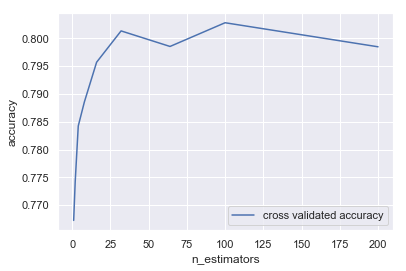

In [809]:
line1= plt.plot(n_estimators, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('n_estimators')
plt.legend()
plt.show()

In [810]:
best_n_estimators = n_estimators[cv_results.index(max(cv_results))]
print ("best_n_estimators: ", best_n_estimators)
print ("best accuracy: ", max(cv_results))

best_n_estimators:  100
best accuracy:  0.8028064036392267


### max_depth : integer or None, optional (default=None)

In [811]:
cv_results = []
max_depths = np.linspace(1, 32, 32, endpoint=True)  ## try different max_depths
for max_depth in max_depths:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=max_depth)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

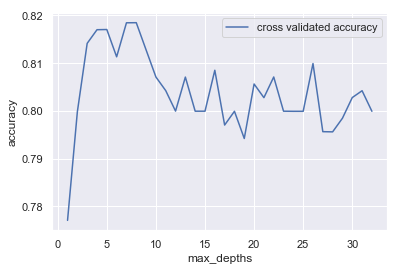

In [812]:
line1= plt.plot(max_depths, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_depths')
plt.legend()
plt.show()

In [813]:
best_max_depths = max_depths[cv_results.index(max(cv_results))]
print ("best_max_depths:", best_max_depths)
print ("best accuracy: ", max(cv_results))

best_max_depths: 8.0
best accuracy:  0.818481614323623


### min_samples_split : int, float, optional (default=2)

In [814]:
cv_results = []
min_samples_splits = [2,3,5,10,20,30,40,50,60,70,80]  ## try different min_samples_splits
for min_samples_split in min_samples_splits:
    rf = RandomForestClassifier(n_estimators = best_n_estimators, max_depth=best_max_depths,min_samples_split=min_samples_split)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

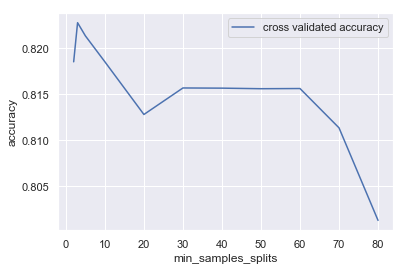

In [815]:
line1= plt.plot(min_samples_splits, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_splits')
plt.legend()
plt.show()

In [816]:
best_min_samples_splits = min_samples_splits[cv_results.index(max(cv_results))]
print ("best_min_samples_splits: ", best_min_samples_splits)
print ("best accuracy", max(cv_results))

best_min_samples_splits:  3
best accuracy 0.8227673286093372


## Optimize other parameters
max features & min sample leaf

In [817]:
cv_results = []
max_features =  [1,2,3,4] ## try different max_features
for max_feature in max_features:
    rf = RandomForestClassifier(n_estimators = best_n_estimators,max_depth=best_max_depths,min_samples_split=best_min_samples_splits, max_features=max_feature)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())
cv_results
max_features

[1, 2, 3, 4]

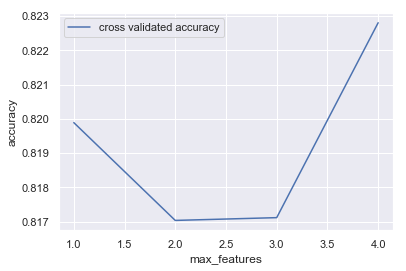

In [818]:
line1= plt.plot(max_features, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('max_features')
plt.legend()
plt.show()

In [819]:
best_max_features = max_features[cv_results.index(max(cv_results))]
print ("best_max_features: ", best_max_features)
print ("best accuracy", max(cv_results))

best_max_features:  4
best accuracy 0.8228075700580293


In [835]:
cv_results = []
min_samples_leafs = [0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8,9,10] ## try different min_samples_leafs
for min_samples_leaf in min_samples_leafs:
    rf = RandomForestClassifier(n_estimators = best_n_estimators,max_depth=best_max_depths,min_samples_split=best_min_samples_splits, max_features=best_max_features,min_samples_leaf = min_samples_leaf)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())

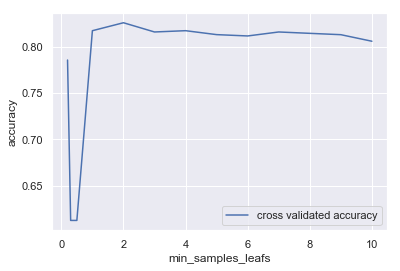

In [836]:
line1= plt.plot(min_samples_leafs, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('min_samples_leafs')
plt.legend()
plt.show()

In [837]:
best_min_samples_leafs = min_samples_leafs[cv_results.index(max(cv_results))]
print ("best_max_leafs: ", best_min_samples_leafs)
print ("best accuracy", max(cv_results))

best_max_leafs:  2
best accuracy 0.825706120782667


In [838]:
cv_results = []
random_state = [1,2,3,4,5,6,7,8,9,10] ## try different random_state
for random_states in random_state:
    rf = RandomForestClassifier(n_estimators = best_n_estimators,max_depth=best_max_depths,min_samples_split=best_min_samples_splits, max_features=best_max_features,min_samples_leaf = best_min_samples_leafs,random_state = random_states)
    acc = model_selection.cross_val_score(rf, df_train, y, cv=10, scoring=scorer)
    cv_results.append(acc.mean())


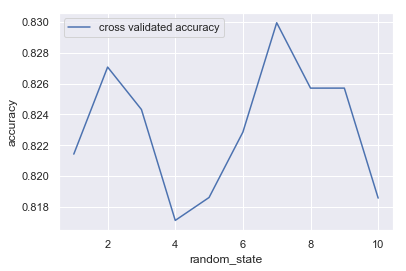

In [839]:
line1= plt.plot(random_state, cv_results, 'b', label="cross validated accuracy")
plt.ylabel('accuracy')
plt.xlabel('random_state')
plt.legend()
plt.show()

In [840]:
best_random_state = random_state[cv_results.index(max(cv_results))]
print ("best_random_state: ", random_state)
print ("best accuracy", max(cv_results))

best_random_state:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
best accuracy 0.8299515936196894


# Apply the parameters to testing set

In [841]:
rf = RandomForestClassifier(n_estimators = best_n_estimators,max_depth=best_max_depths,min_samples_split=best_min_samples_splits, max_features=best_max_features,min_samples_leaf = best_min_samples_leafs,random_state = best_random_state                                         )
rf.fit(df_train, y)
train_pred = rf.predict(df_train)
print ("Training acc:", accuracy_score(y, train_pred))
y_pred = rf.predict(X_test)
print ("Testing acc:", accuracy_score(y_test, y_pred))

Training acc: 0.8714285714285714
Testing acc: 0.8638743455497382


## Logisitc Regression
Try to use other model to predict

In [827]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression(penalty='l1') # !--- Initialize the model here ---!
lr_model.fit(df_train,y) # !-- Fill the training data here --!

print('training accuracy:')
# !-- Predict training target & print the training accuracy here --!
lr_training_acc = np.mean(lr_model.predict(df_train) == y)
print(lr_training_acc)

print('\ntesting accuracy:')
# !-- Predict testing target & print the testing accuracy here --!
lr_predict_test_result = lr_model.predict(X_test)
lr_testing_acc = np.mean(lr_predict_test_result == y_test)
print(lr_testing_acc)

print('\npredicted testing labels:')
print(lr_predict_test_result)

training accuracy:
0.7842857142857143

testing accuracy:
0.8115183246073299

predicted testing labels:
[1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0
 1 0 1 1 1 0]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## SVM Model

In [828]:
from sklearn.svm import SVC

svc_model =  SVC(gamma='auto',C=5)# !--- Initialize the model here ---!
svc_model.fit(df_train,y) # !-- Fill the training data here --!

print('training accuracy:')
# !-- Predict training target & print the training accuracy here --!
#print(svc_model.predict(df_train))
#train_y_df
svc_training_acc = np.mean(svc_model.predict(df_train) == y)
print(svc_training_acc)

print('\ntesting accuracy:')
# !-- Predict testing target & print the testing accuracy here --!
svc_predict_test_result = svc_model.predict(X_test)
svc_testing_acc = np.mean(svc_predict_test_result == y_test)
print(svc_testing_acc)

print('\npredicted testing labels:')
print(svc_predict_test_result)

training accuracy:
0.8885714285714286

testing accuracy:
0.8481675392670157

predicted testing labels:
[1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0
 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0
 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0]


# Discussion

1. Adding New features sometimes may improve the accuracy. While some of the new features have a very good distribution, the accuracy does not improve and the importances of the features are very small.
2. Changing parameters can affect the accuracy a lot. Avoiding overfitting and lowfitting is very important. We can easily find the optimal condition by comparing the training accuracy and testing accuracy.
3. There are many invalid data in Age column. We fill in the average number into the empty ones, which may lead to bias. However, discarding them will make the number of the data too small. Trying to use the whole original data may be able to get a better result. Additionally, classifying the age data may be helpful since the Age number variation is very large. But it's hard to find a best condition to train.
4. We have also used two other models that have been taught in the class. We try to find the optimal parameters to get a good accuracy. But the accuracy seems not improved. Understanding the use of other parameters and may promote the accuracy.
5. Modifying features may be a very good to get a great performance model. Learning how to distinguish difference in the kde plot could be very helpful.